# MATH 210 Introduction to Mathematical Computing

## April 4, 2018

* Weather data
    * Import csv
    * Create columns
    * Groupby
    * Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The Government of Canada's Department of Environment and Climate Change collects weather data across the country. Historical data has been collected by [weatherstats.ca](http://www.weatherstats.ca). I have download 

In [6]:
data = pd.read_csv('http://www.math.ubc.ca/~pwalls/data/weather.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
date_time_local      50000 non-null object
unixtime             50000 non-null int64
pressure_station     50000 non-null float64
pressure_sea         50000 non-null float64
wind_dir             49246 non-null object
wind_dir_10s         49405 non-null float64
wind_speed           50000 non-null int64
wind_gust            4179 non-null float64
relative_humidity    50000 non-null int64
dew_point            50000 non-null float64
temperature          50000 non-null float64
windchill            1968 non-null float64
humidex              2439 non-null float64
visibility           49981 non-null float64
health_index         49554 non-null float64
cloud_cover_4        0 non-null float64
cloud_cover_8        38820 non-null float64
cloud_cover_10       5654 non-null float64
solar_radiation      0 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 7.2+ MB


In [8]:
data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-04-04 10:00:00 PDT,1522861200,101.85,101.9,ESE,11.0,14,NaN,79,3.9,7.2,NaN,NaN,48300.0,NaN,NaN,NaN,NaN,NaN
1,2018-04-04 09:00:00 PDT,1522857600,101.81,101.9,ESE,11.0,18,NaN,79,3.2,6.6,NaN,NaN,48300.0,2.6,NaN,8.0,NaN,NaN
2,2018-04-04 08:00:00 PDT,1522854000,101.80,101.9,E,8.0,17,NaN,78,2.6,6.0,NaN,NaN,48300.0,2.5,NaN,8.0,NaN,NaN
3,2018-04-04 07:00:00 PDT,1522850400,101.80,101.9,E,9.0,10,NaN,79,1.9,5.3,NaN,NaN,48300.0,2.4,NaN,8.0,NaN,NaN
4,2018-04-04 06:00:00 PDT,1522846800,101.78,101.8,ESE,10.0,13,NaN,80,2.1,5.2,NaN,NaN,32200.0,2.3,NaN,8.0,NaN,NaN


There is a lot of data but we'll focus on wind spped and direction, and temperature.

In [11]:
data = pd.read_csv('http://www.math.ubc.ca/~pwalls/data/weather.csv',usecols=(0,4,6,10))

In [12]:
data.head()

,date_time_local,wind_dir,wind_speed,temperature
0,2018-04-04 10:00:00 PDT,ESE,14,7.2
1,2018-04-04 09:00:00 PDT,ESE,18,6.6
2,2018-04-04 08:00:00 PDT,E,17,6.0
3,2018-04-04 07:00:00 PDT,E,10,5.3
4,2018-04-04 06:00:00 PDT,ESE,13,5.2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
date_time_local    50000 non-null object
wind_dir           49246 non-null object
wind_speed         50000 non-null int64
temperature        50000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


panda has a lot of time series functionality. See the [documentation]. However, we'll do it ourselves!

Let's look at the first string in the data.

In [14]:
first_row_date = data['date_time_local'][0]

In [15]:
print(first_row_date)

2018-04-04 10:00:00 PDT


In [16]:
type(first_row_date)

str

Let's pull the year out of the string as an integer!

In [17]:
int(first_row_date[0:4])

2018

Let's write a function which does this operation.

In [18]:
def get_year(text):
    return int(text[0:4])

In [19]:
get_year('2018-04-04 10:00:00 PDT')

2018

Now let's apply this to the whole data column to create a new column for the year!

In [20]:
data['year'] = data['date_time_local'].apply(get_year)

In [21]:
data.head()

,date_time_local,wind_dir,wind_speed,temperature,year
0,2018-04-04 10:00:00 PDT,ESE,14,7.2,2018
1,2018-04-04 09:00:00 PDT,ESE,18,6.6,2018
2,2018-04-04 08:00:00 PDT,E,17,6.0,2018
3,2018-04-04 07:00:00 PDT,E,10,5.3,2018
4,2018-04-04 06:00:00 PDT,ESE,13,5.2,2018


Let's do the same for the month, day and hour!

In [24]:
def get_month(text):
    return int(text[5:7])

In [25]:
get_month('2018-04-04 10:00:00 PDT')

4

In [26]:
data['month'] = data['date_time_local'].apply(get_month)

In [28]:
def get_day(text):
    return int(text[8:10])

In [29]:
get_day('2018-04-04 10:00:00 PDT')

4

In [30]:
data['day'] = data['date_time_local'].apply(get_day)

In [35]:
def get_hour(text):
    return int(text[11:13])

In [36]:
get_hour('2018-04-04 10:00:00 PDT')

10

In [37]:
data['hour'] = data['date_time_local'].apply(get_hour)

In [38]:
data.head()

,date_time_local,wind_dir,wind_speed,temperature,year,month,day,hour
0,2018-04-04 10:00:00 PDT,ESE,14,7.2,2018,4,4,10
1,2018-04-04 09:00:00 PDT,ESE,18,6.6,2018,4,4,9
2,2018-04-04 08:00:00 PDT,E,17,6.0,2018,4,4,8
3,2018-04-04 07:00:00 PDT,E,10,5.3,2018,4,4,7
4,2018-04-04 06:00:00 PDT,ESE,13,5.2,2018,4,4,6


Let's look at average temperature by month.

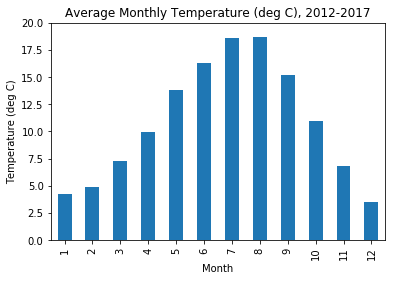

In [46]:
data.groupby('month')['temperature'].mean().plot(kind='bar')
plt.title('Average Monthly Temperature (deg C), 2012-2017')
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')
plt.ylim([0,20])
plt.show()

Let's do the same but compare year to year.

In [49]:
temps = data.groupby(['month','year'])['temperature'].mean().unstack()

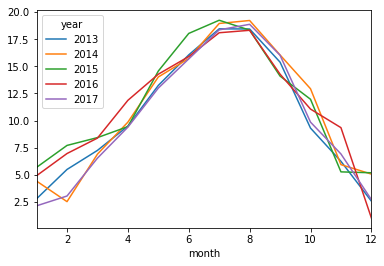

In [50]:
temps[[2013,2014,2015,2016,2017]].plot()
plt.show()

Let's look at the predominant wind direction!

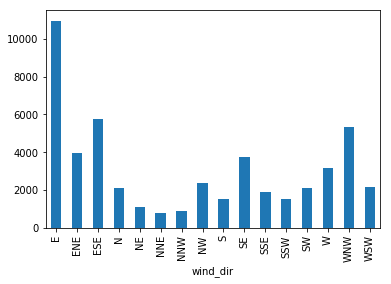

In [52]:
data.groupby('wind_dir').size().plot(kind='bar')

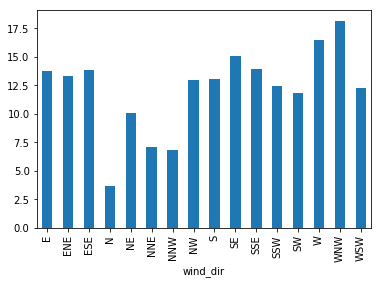

In [54]:
data.groupby('wind_dir')['wind_speed'].mean().plot(kind='bar')